In [62]:
import pandas as pd
import numpy as np

leer_excel = pd.read_excel('../pdfs_mbrs_v2.xlsx', sheet_name='2005819 ELECTROLIT COCO 100 mL', header=1, skiprows=0)
#leer_excel = pd.read_excel('../datos_limpios.xlsx', sheet_name='Out_5', header=1, skiprows=0)
pd_excel = leer_excel.dropna(axis=0, how='all')
pd_excel = pd_excel.dropna(subset=['Distancia Levenshtein(similitud)  dato esperado vs dato obtenido'])
pd_excel = pd_excel.astype({"Distancia Levenshtein(similitud)  dato esperado vs dato obtenido": 'int'})
pd_excel.rename(columns={"Distancia Levenshtein(similitud)  dato esperado vs dato obtenido": "levenshtein", "Etapa de proceso": "etapa_proceso"}, inplace=True)
df = pd_excel[["Dato de la MBR que se consulta", "etapa_proceso", "Sección de la MBR", "Encabezado de dato", "Dato extraido - Esperado","Dato obtenido", "levenshtein", "PAGINA DEL DATO (EN PDF)"]]
#presentacion_excel = pd_excel[["Dato de la MBR que se consulta", "Etapa de proces"]]
# pd_excel = pd_excel[["Etapa de proceso", "Distancia Levenshtein(similitud)  dato esperado vs dato obtenido"]]
# pd_excel.rename(columns={"Distancia Levenshtein(similitud)  dato esperado vs dato obtenido": "levenshtein", "Etapa de proceso": "etapa_proceso"}, inplace=True)
df

,Dato de la MBR que se consulta,etapa_proceso,Sección de la MBR,Encabezado de dato,Dato extraido - Esperado,Dato obtenido,levenshtein,PAGINA DEL DATO (EN PDF)
0,Temperatura,Surtido de materias primas,5.3 Confirmación de condiciones ambientales de...,Temperatura,21.3 ºC,21.3°c,91,8.0
1,Humedad Relativa,Surtido de materias primas,5.3 Confirmación de condiciones ambientales de...,Humedad Relativa,53.9 %,%\n53.9,100,8.0
2,Temperatura,Fabricación,5.3 Confirmación de condiciones ambientales de...,Temperatura,23.7 ºC,23.7 °c,100,3.0
3,Humedad Relativa,Fabricación,5.3 Confirmación de condiciones ambientales de...,Humedad Relativa,34.2%,0.34,75,3.0
5,Resultado Flujo difusivo (al fin de uso),Fabricación,6.5 Resultados de las pruebas de integridad al...,Resultado Flujo difusivo,4.0 ML/min,40 m min,80,1.0
...,...,...,...,...,...,...,...,...
154,Registro de mermas y producto no conforme,Acondicionado,20. Conciliación de materiales de acondicionado,Cantidad PNC - 3,0,SIN RECONOCIMEINTO,0,NaN
155,Registro de mermas y producto no conforme,Acondicionado,20. Conciliación de materiales de acondicionado,Cantidad PNC - 4,NaN,SIN RECONOCIMEINTO,0,NaN
156,Piezas esterilizadas,Acondicionado,21. Rendimiento de acondicionado,Piezas esterilizadas,20024,cantidad total de,0,17.0
157,Cantidad real obtenida (Piezas acondicionadas),Acondicionado,21. Rendimiento de acondicionado,Piezas acondicionadas,Ilegible,cantidad real,0,17.0


# Cantidad de campos a extraer

In [63]:
len(df.index)

146

In [64]:
df['etapa_proceso'].value_counts()

etapa_proceso
Fabricación                   91
Envase                        43
Acondicionado                 10
Surtido de materias primas     2
Name: count, dtype: int64

#  Numeralia por etapa de proceso

In [65]:
df['No leidos'] = df['levenshtein'].apply(lambda x: 1 if int(x) < 1 else 0)
df['Acercamiento'] = df['levenshtein'].apply(lambda x: 1 if int(x) < 79 and int(x) > 1 else 0)
df['Leidos'] = df['levenshtein'].apply(lambda x: 1 if int(x) > 80 else 0)
aggregated = df.groupby('etapa_proceso')[['Leidos', 'No leidos', 'Acercamiento']].sum()
#aggregated['Porcentaje'] = aggregated['Leidos'] / (aggregated['Leidos'] + aggregated['No leidos']) * 100
aggregated

C:\Users\EON-36\AppData\Local\Temp\ipykernel_12636\3541517228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No leidos'] = df['levenshtein'].apply(lambda x: 1 if int(x) < 1 else 0)
C:\Users\EON-36\AppData\Local\Temp\ipykernel_12636\3541517228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acercamiento'] = df['levenshtein'].apply(lambda x: 1 if int(x) < 79 and int(x) > 1 else 0)
C:\Users\EON-36\AppData\Local\Temp\ipykernel_12636\3541517228.py:3: SettingWithCopyWarning: 
A value is trying to

,Leidos,No leidos,Acercamiento
etapa_proceso,,,
Acondicionado,0,10,0
Envase,16,27,0
Fabricación,60,7,20
Surtido de materias primas,2,0,0


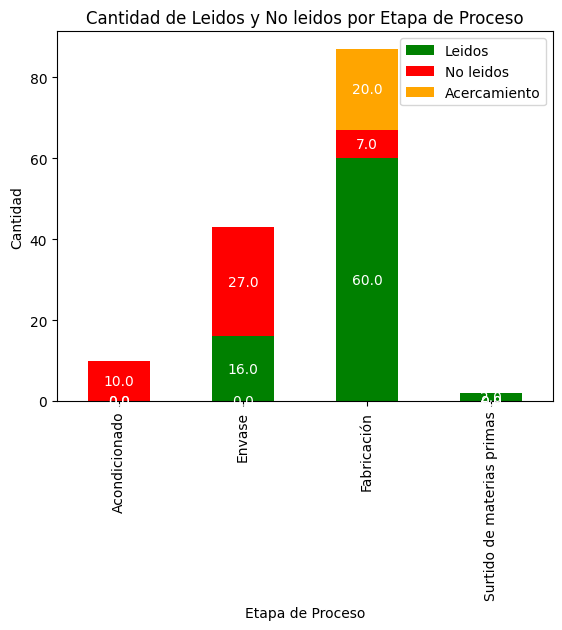

In [66]:
# Plot the stacked bar chart
ax = aggregated.plot(kind="bar", stacked=True, color=['green', 'red', 'orange' ])

# Add labels and title
plt.xlabel("Etapa de Proceso")
plt.ylabel("Cantidad")
plt.title("Cantidad de Leidos y No leidos por Etapa de Proceso")

# Add labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{height}", (x + width/2, y + height/2), ha="center", color='w', va="center")

plt.show()


# Porcentaje de datos leidos

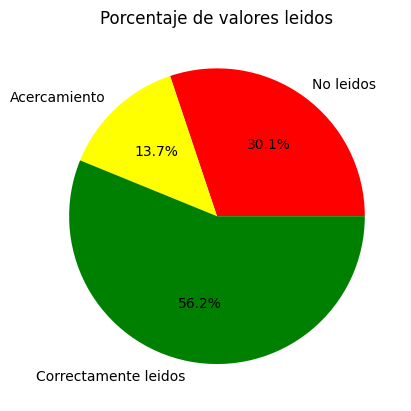

In [67]:

import matplotlib.pyplot as plt
porcentaje_no_leido = (df['levenshtein'] == 0).mean() * 100
porcentaje_mayor_80 = ((df['levenshtein'] >= 80) & (df['levenshtein'] <= 100)).mean() * 100
porcentaje_entre_1_79 = ((df['levenshtein'] >= 1) & (df['levenshtein'] <= 79)).mean() * 100
porcentajes = [porcentaje_no_leido, porcentaje_entre_1_79, porcentaje_mayor_80]
etiquetas = ['No leidos', 'Acercamiento', 'Correctamente leidos']
colors = ['red', 'yellow', 'green']
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colors)
plt.title('Porcentaje de valores leidos')
plt.show()

# Porcentaje extracción de datos esperado vs obtenido

In [68]:
df["levenshtein"].mean()

61.38356164383562

In [69]:
df.head(4)[['Dato extraido - Esperado', 'Dato obtenido', 'levenshtein']]

,Dato extraido - Esperado,Dato obtenido,levenshtein
0,21.3 ºC,21.3°c,91
1,53.9 %,%\n53.9,100
2,23.7 ºC,23.7 °c,100
3,34.2%,0.34,75
